# Project Name : Credit Card Fraud Detection using PyCaret
# Made by: Yatharth Asthana

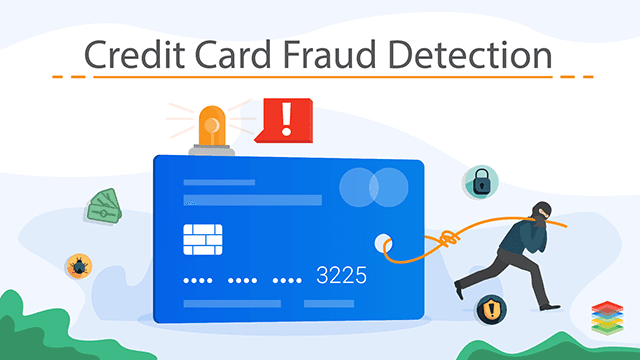

#### In this project we will be first making our redictions using Machine Learning Techniques then we will be using Auto ML Technique to do the same. We will be using PyCaret in this notebook

## Motivation for the Project
### The surge in online payments and credit card usage has made fraud detection a critical challenge. Identifying fraudulent transactions swiftly is not only essential to prevent financial losses but also to maintain customer trust and operational efficiency. My passion lies in leveraging advanced technologies to solve real-world problems. PyCaret, with its robust Auto ML capabilities, offers a streamlined and efficient way to build and optimize machine learning models. This makes it an ideal tool for developing a high-performance fraud detection system.

### In this project we will be implementing Anamoly detection to detect wheteher there is any fraudulent transaction.

## Content
### The dataset contains transactions made by credit cards in September 2013 by European cardholders.
### This dataset presents transactions that occurred in two days, where we have 94 frauds out of 29,798 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.315% of all transactions.

### It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Given the class imbalance ratio, I have measured the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## In this notebook, following tasks have been performed:
- Data Analysis
- Feature Engineering
- Model Building and Prediction using ML Techniques
- Model Building and Prediction using PyCaret(Auto ML)

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score

### Importing Libraries for Outlier Detection

In [ ]:
from sklearn.ensemble import IsolationForest

from sklearn.svm import OneClassSVM

### Reading our Dataset

In [ ]:
df= pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### Data Analysis

In [ ]:
df.shape

(29799, 31)

#### Checking Null Values

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,1
V7,1
V8,1
V9,1


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,29799.000000,29799.000000,29799.000000,29799.000000,29799.000000,29799.000000,29798.000000,29798.000000,29798.000000,29798.000000,...,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000
mean,21415.425719,-0.209312,0.125470,0.720538,0.213023,-0.203808,0.089008,-0.121495,0.030902,0.351012,...,-0.033872,-0.123746,-0.041956,0.009204,0.132632,0.022783,0.012362,0.004780,79.620566,0.003155
std,12038.537147,1.845781,1.543515,1.613657,1.418989,1.419221,1.321267,1.291495,1.287706,1.257026,...,0.786840,0.640527,0.540717,0.591995,0.435684,0.511026,0.388416,0.273684,222.110430,0.056078
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,10122.000000,-0.951024,-0.446725,0.261163,-0.697463,-0.798822,-0.653976,-0.595929,-0.160211,-0.456677,...,-0.244970,-0.546113,-0.176410,-0.327428,-0.129629,-0.334686,-0.063502,-0.007942,6.540000,0.000000
50%,26182.000000,-0.249361,0.149599,0.844654,0.197721,-0.237290,-0.171222,-0.068568,0.035759,0.244841,...,-0.090713,-0.096810,-0.050365,0.062233,0.172286,-0.057223,0.008246,0.020445,20.000000,0.000000
75%,32195.000000,1.165752,0.788149,1.473903,1.096170,0.312701,0.475508,0.444292,0.294166,1.106549,...,0.083442,0.285024,0.075052,0.398687,0.415022,0.303728,0.089536,0.076514,70.750000,0.000000
max,35634.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29799 entries, 0 to 29798
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    29799 non-null  int64  
 1   V1      29799 non-null  float64
 2   V2      29799 non-null  float64
 3   V3      29799 non-null  float64
 4   V4      29799 non-null  float64
 5   V5      29799 non-null  float64
 6   V6      29798 non-null  float64
 7   V7      29798 non-null  float64
 8   V8      29798 non-null  float64
 9   V9      29798 non-null  float64
 10  V10     29798 non-null  float64
 11  V11     29798 non-null  float64
 12  V12     29798 non-null  float64
 13  V13     29798 non-null  float64
 14  V14     29798 non-null  float64
 15  V15     29798 non-null  float64
 16  V16     29798 non-null  float64
 17  V17     29798 non-null  float64
 18  V18     29798 non-null  float64
 19  V19     29798 non-null  float64
 20  V20     29798 non-null  float64
 21  V21     29798 non-null  float64
 22

In [ ]:
df['Class'].value_counts(normalize=True)

,proportion
Class,
0.0,0.996845
1.0,0.003155


In [ ]:
df.dropna(inplace=True)

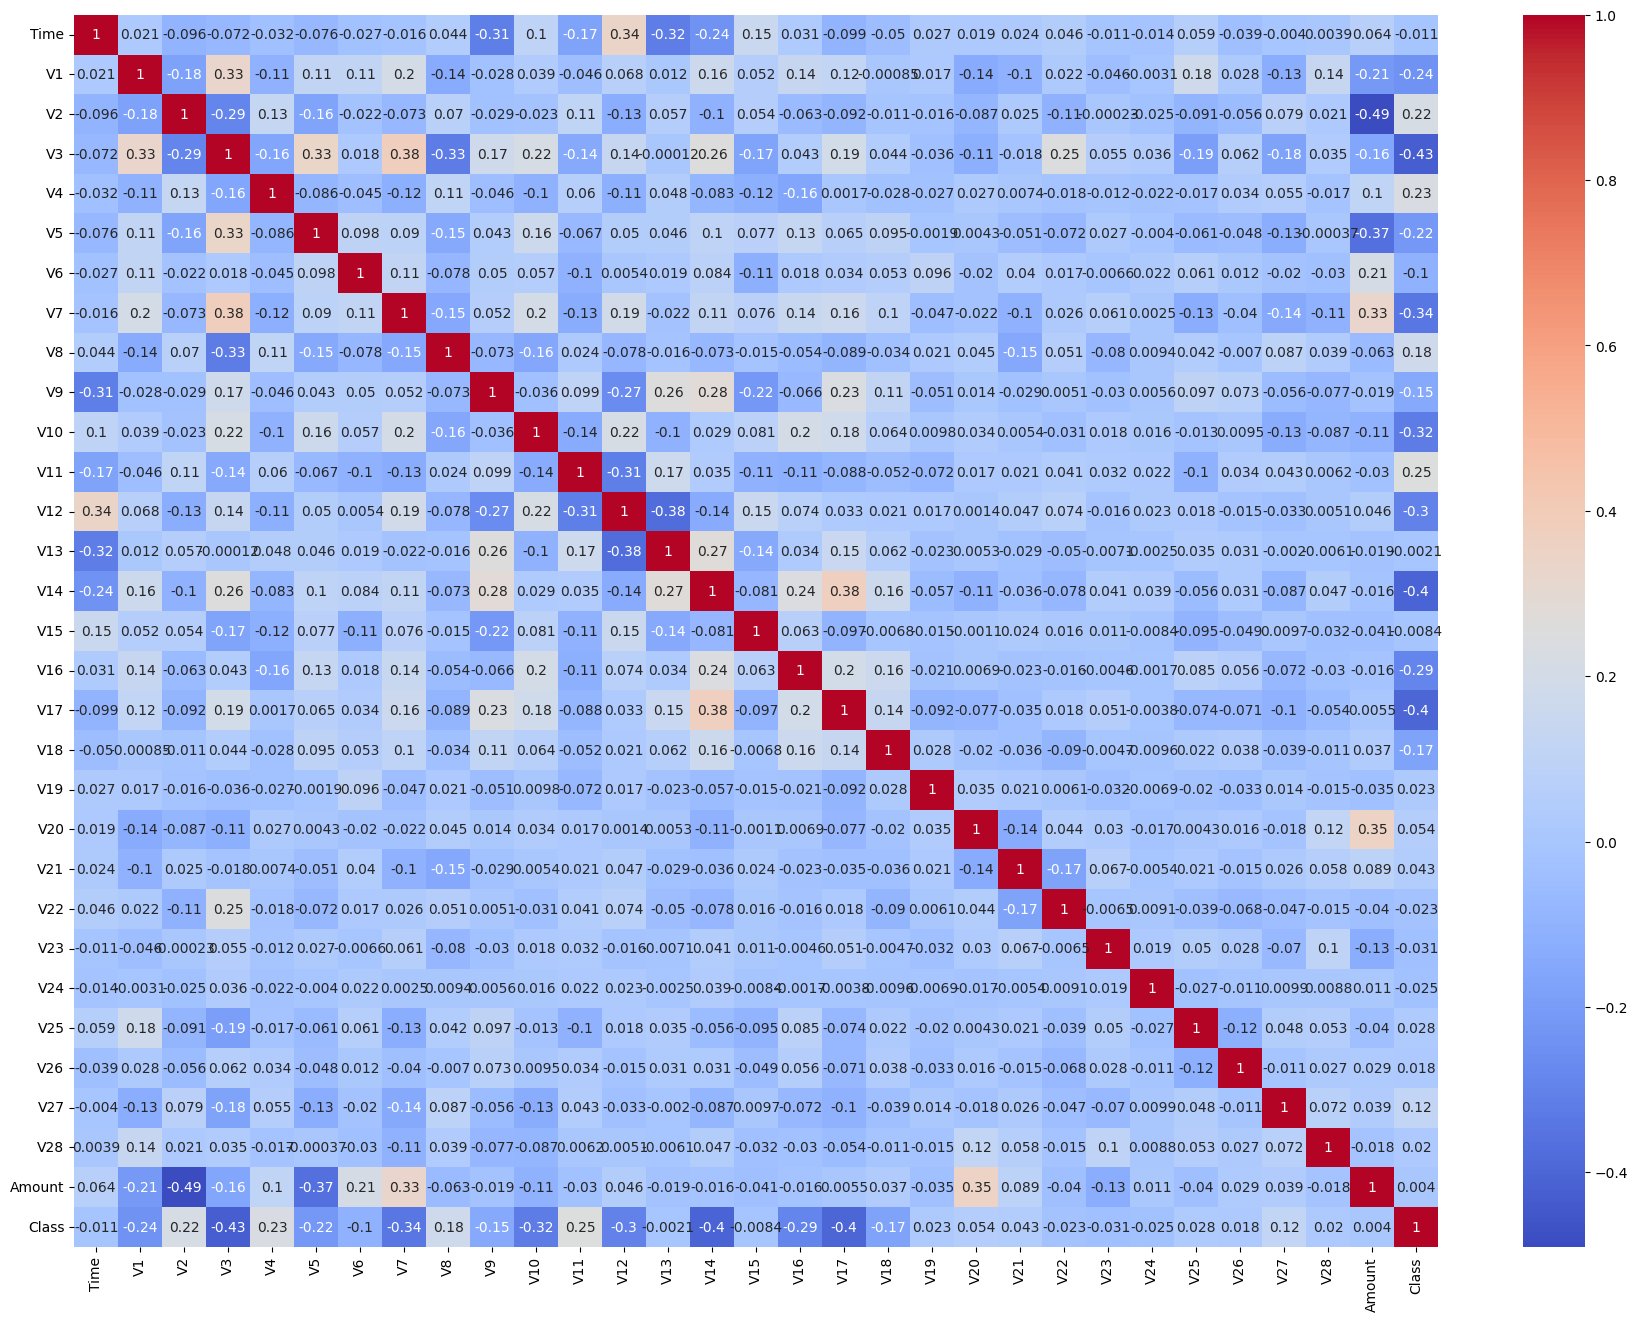

In [ ]:
# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 16))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()


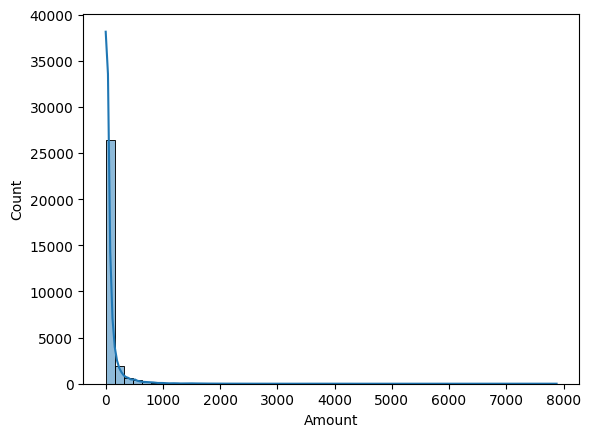

In [ ]:
# Visualizing 'Amount' distribution
sns.histplot(df['Amount'], bins=50, kde=True)
plt.show()


In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29793,35632,1.124072,-0.896437,-0.050263,-0.660483,-0.545078,0.191027,-0.448134,0.134930,-0.961901,...,0.306007,0.747245,-0.188116,-0.231248,0.562319,-0.031430,0.000160,0.001351,99.00,0.0
29794,35633,0.786689,-0.691214,-0.329291,0.149435,0.714779,1.949061,-0.136906,0.474172,0.206173,...,-0.165285,-0.793473,-0.030110,-2.358519,-0.096468,0.332321,-0.001435,0.025559,200.00,0.0
29795,35633,0.800996,-2.159993,0.008378,-1.081828,-1.768799,-0.445016,-0.571165,-0.162429,-1.785636,...,0.016930,-0.350492,-0.234889,0.062628,0.163018,-0.212022,-0.024151,0.077021,363.00,0.0
29796,35633,1.115726,-0.472602,0.983034,0.294673,-1.218768,-0.341755,-0.667340,0.171155,0.805427,...,0.104463,0.366801,-0.073219,0.623597,0.247275,1.121835,-0.060566,0.003541,36.92,0.0


### Checking the distribution of Normal and Fraud cases in our Data Set

<ipython-input-19-fd19ec9a08cf>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  fraud_check = pd.value_counts(df['Class'], sort = True)


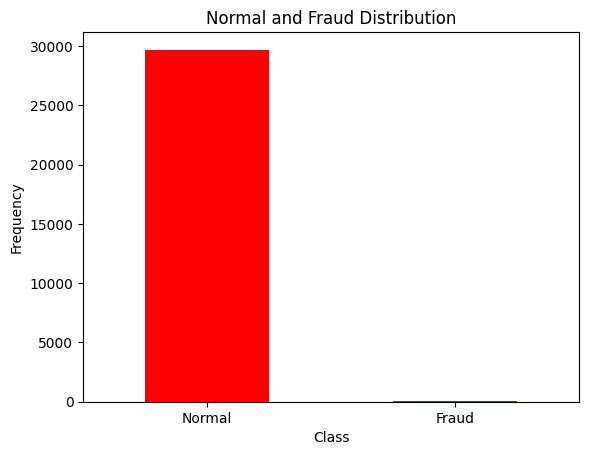

In [ ]:
fraud_check = pd.value_counts(df['Class'], sort = True)
fraud_check.plot(kind = 'bar', rot=0, color= 'r')
plt.title("Normal and Fraud Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
 ## Defining labels to replace our 0 and 1 value
labels= ['Normal','Fraud']
## mapping those labels
plt.xticks(range(2), labels)
plt.show()


#### Let us see what is the shape of Normal and Fraud data set

In [ ]:
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

In [ ]:
fraud_people.shape

(94, 31)

In [ ]:
normal_people.shape

(29704, 31)

#### Finding out the avg amount in our both the data sets

In [ ]:
fraud_people['Amount'].describe()

,Amount
count,94.000000
mean,95.590000
std,257.920621
min,0.000000
25%,1.000000
50%,1.050000
75%,99.990000
max,1809.680000


In [ ]:
normal_people['Amount'].describe()

,Amount
count,29704.000000
mean,79.570030
std,221.991154
min,0.000000
25%,6.637500
50%,20.000000
75%,70.652500
max,7879.420000


#### Let us analyse it visually

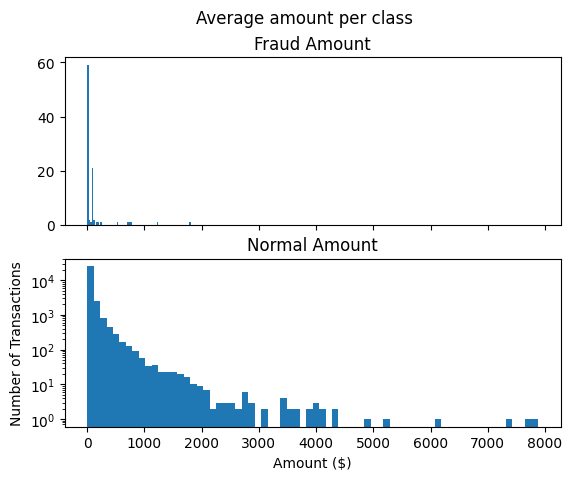

In [ ]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex= True)
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(fraud_people['Amount'] , bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_people['Amount'] , bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

#### Plotting a corr Heatmap

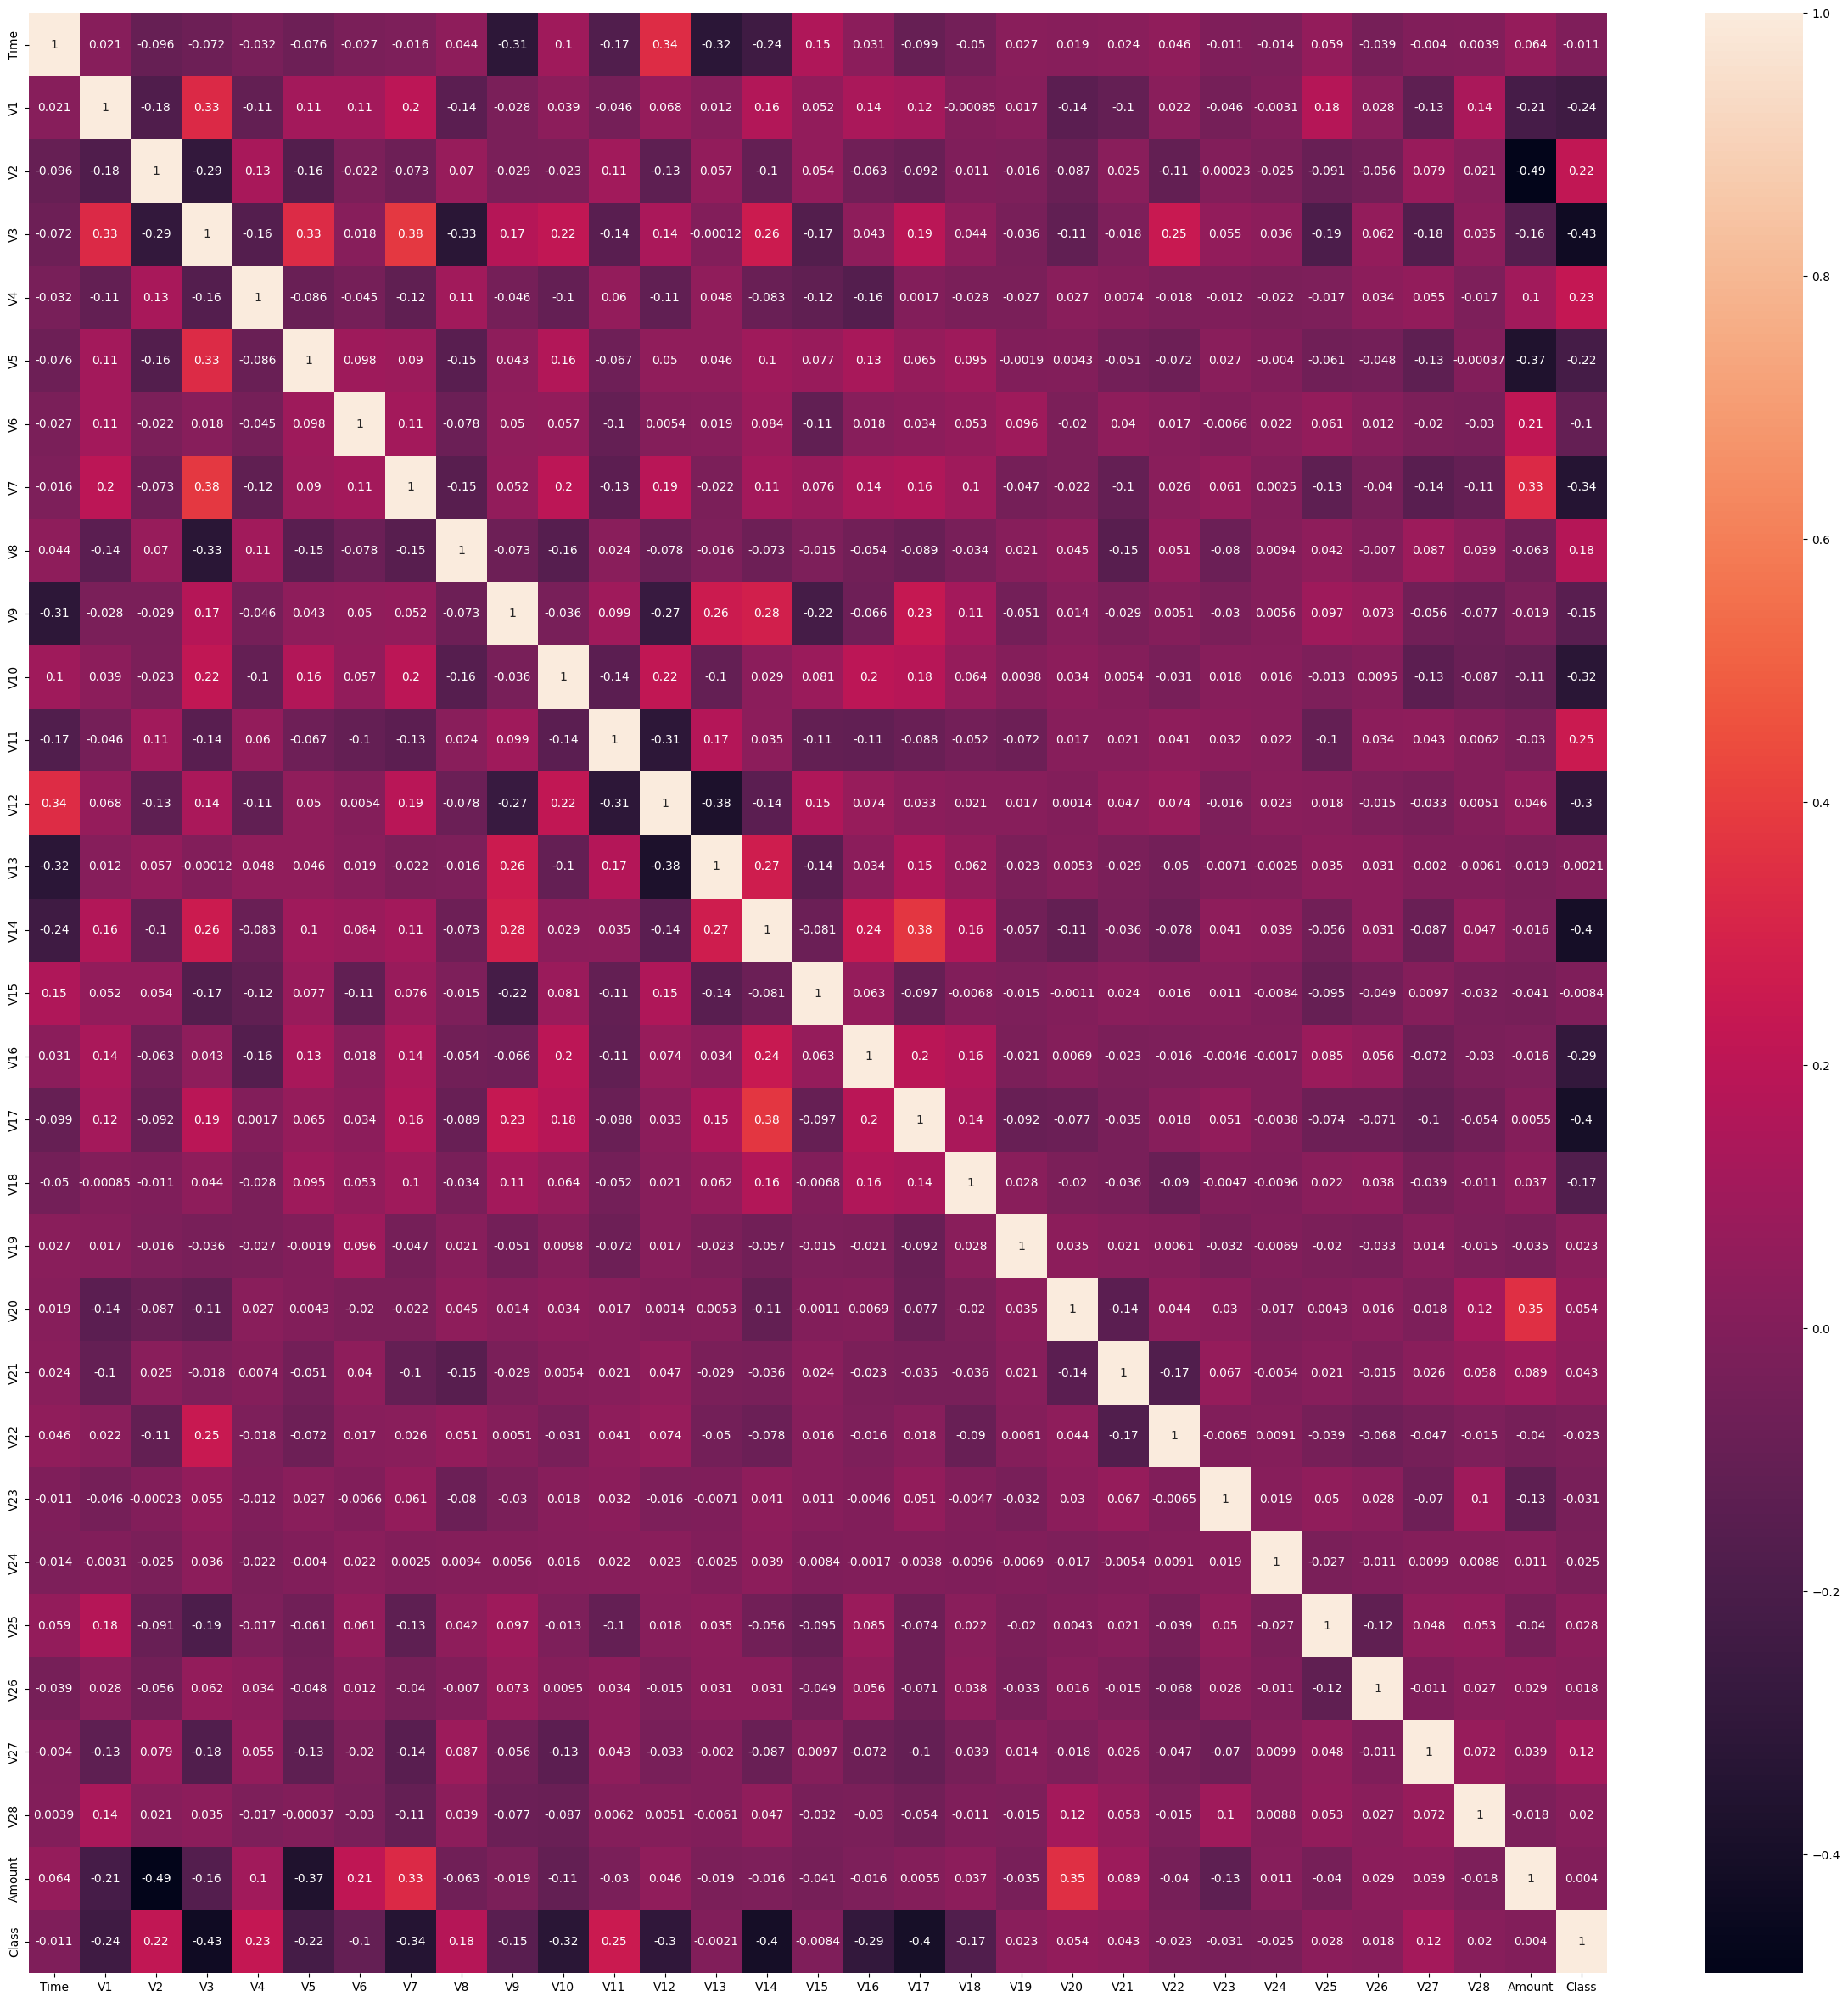

In [ ]:
df.corr()
plt.figure(figsize=(30,30))
g=sns.heatmap(df.corr(),annot=True)

### Creating our Dependent and Independent Features

In [ ]:
columns = df.columns.tolist()
# Making our Independent Features
columns = [var for var in columns if var not in ["Class"]]
# Making our Dependent Variable
target = "Class"
x= df[columns]
y= df[target]

In [ ]:
x.shape

(29798, 30)

In [ ]:
y.shape

(29798,)

In [ ]:
x.head() ## Independent Variable

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y.head() ## Dependent Variable

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


## Model building

### Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

### We wil be using the following Models for our Anamoly Detection:
- Isolation Forest
- OneClassSVM

## Isolation Forest

#### One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

#### This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

#### Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

#### How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

#### The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation

In [ ]:
iso_forest= IsolationForest(n_estimators=100, max_samples=len(x_train),random_state=0, verbose=0)

In [ ]:
iso_forest.fit(x_train,y_train)

IsolationForest(max_samples=20858, random_state=0)

In [ ]:
ypred= iso_forest.predict(x_test)

In [ ]:
ypred

array([1, 1, 1, ..., 1, 1, 1])

#### Mapping the values as we want to have an output in 0 and 1

In [ ]:
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1


### Accuracy score and Matrix

In [ ]:
print(accuracy_score(y_test,ypred))

0.992841163310962


In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      8911
         1.0       0.28      0.76      0.41        29

    accuracy                           0.99      8940
   macro avg       0.64      0.88      0.70      8940
weighted avg       1.00      0.99      0.99      8940



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, ypred)

array([[8854,   57],
       [   7,   22]])

### We can also print how many errors our model have

In [ ]:
n_errors = (ypred != y_test).sum()
print("Isolation Forest have {} errors.".format(n_errors))

Isolation Forest have 64 errors.


## OneClassSVM

In [ ]:
svm= OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05,
                                         max_iter=-1)

In [ ]:
svm.fit(x_train,y_train)

OneClassSVM(gamma=0.1, nu=0.05)

In [ ]:
ypred1= svm.predict(x_test)

#### Here also we do the same thing as above, mapping our results in 0 and 1

In [ ]:
ypred1[ypred1 == 1] = 0
ypred1[ypred1 == -1] = 1

### Accuracy score and Matrix

In [ ]:
print(accuracy_score(y_test,ypred))

0.992841163310962


In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      8911
         1.0       0.28      0.76      0.41        29

    accuracy                           0.99      8940
   macro avg       0.64      0.88      0.70      8940
weighted avg       1.00      0.99      0.99      8940



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, ypred)

array([[8854,   57],
       [   7,   22]])

In [ ]:
n_errors = (ypred1 != y_test).sum()
print("SVM have {} errors.".format(n_errors))

SVM have 8767 errors.


## Solving the Problem Statement using PyCaret Library(Auto ML)

# PyCaret :

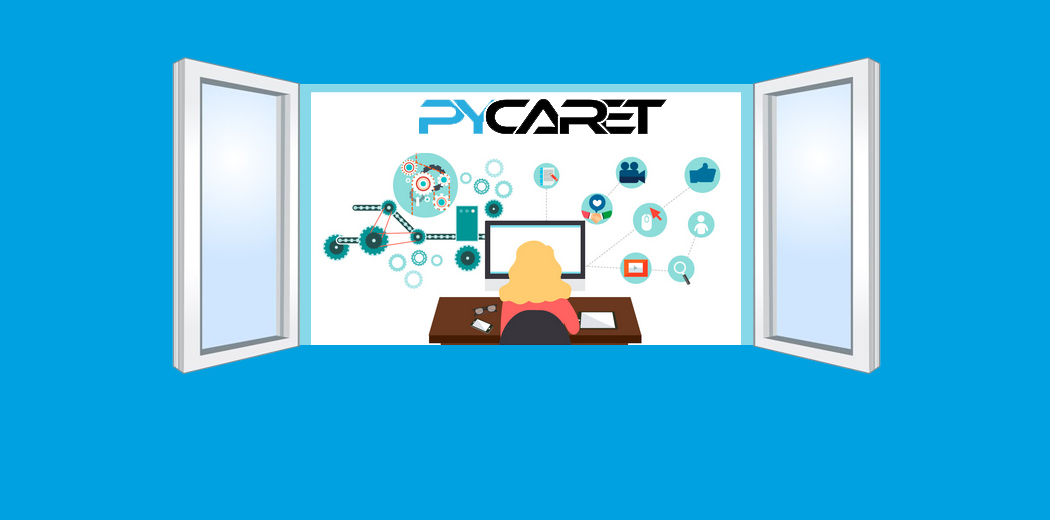

### PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

### Installing Pycaret

In [ ]:
!pip install pycaret

In [ ]:
df= pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [ ]:
df.dropna(inplace= True)

In [ ]:
from pycaret.classification import *

In [ ]:
model= setup(data= df, target= 'Class')

,Description,Value
0,Session id,8344
1,Target,Class
2,Target type,Binary
3,Original data shape,"(124860, 31)"
4,Transformed data shape,"(124860, 31)"
5,Transformed train set shape,"(87402, 31)"
6,Transformed test set shape,"(37458, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9995,0.9401,0.7901,0.9381,0.8501,0.8498,0.8567,59.7160
et,Extra Trees Classifier,0.9995,0.9428,0.7845,0.9559,0.8546,0.8543,0.8620,6.9160
xgboost,Extreme Gradient Boosting,0.9995,0.9679,0.8064,0.9472,0.8609,0.8607,0.8684,1.7700
ada,Ada Boost Classifier,0.9993,0.9590,0.7345,0.8863,0.7993,0.7990,0.8044,24.4650
dt,Decision Tree Classifier,0.9991,0.8782,0.7567,0.8194,0.7764,0.7759,0.7816,5.1710
lda,Linear Discriminant Analysis,0.9991,0.9760,0.7456,0.8216,0.7767,0.7763,0.7797,0.4790
gbc,Gradient Boosting Classifier,0.9988,0.6508,0.5137,0.8440,0.6062,0.6057,0.6336,124.0260
lr,Logistic Regression,0.9987,0.9307,0.5137,0.8050,0.6215,0.6209,0.6395,10.4000
ridge,Ridge Classifier,0.9985,0.9760,0.4304,0.7350,0.5333,0.5326,0.5562,0.1810
knn,K Neighbors Classifier,0.9980,0.6031,0.0167,0.2000,0.0305,0.0305,0.0569,10.5560


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=8344, verbose=0,
                       warm_start=False)

In [ ]:
random_forest= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9994,0.9140,0.7778,0.9333,0.8485,0.8482,0.8517
1,0.9994,0.9187,0.7895,0.9375,0.8571,0.8569,0.8600
2,0.9997,0.9998,0.8333,1.0000,0.9091,0.9089,0.9127
3,0.9997,0.9713,0.8333,1.0000,0.9091,0.9089,0.9127
4,0.9995,0.9999,0.8333,0.9375,0.8824,0.8821,0.8837
5,0.9990,0.8569,0.6111,0.8462,0.7097,0.7092,0.7186
6,0.9990,0.8557,0.5000,1.0000,0.6667,0.6662,0.7067
7,0.9998,0.9999,1.0000,0.9000,0.9474,0.9473,0.9486
8,0.9995,0.9428,0.8333,0.9375,0.8824,0.8821,0.8837


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### As we see we have a very good Kappa score which is often seen in an Imbalanced dataset

In [ ]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=8344, verbose=0,
                       warm_start=False)

### We can Hypertune our model to

In [ ]:
tuned_model= tune_model(random_forest)

NameError: name 'tune_model' is not defined

## Predictions

In [ ]:
pred_holdout = predict_model(random_forest,data= x_test)

In [ ]:
pred_holdout